<a href="https://colab.research.google.com/github/iNeear/CVBAND/blob/main/00_linear_algebra_with_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear algebra with Numpy

Andrés Marrugo, PhD    
Universidad Tecnológica de Bolívar

Based on the jupyter notebook by [Vince Knight](https://github.com/drvinceknight/Python-Mathematics-Handbook)

Many computer vision algorithms require numeric computations performed with matrices and these are best solved with [Numpy](http://www.numpy.org/) a high performance numerical computing library.

Here is how it is described:

> NumPy is the fundamental package for scientific computing with Python. It contains among other things: [...]
 useful linear algebra, Fourier transform, and random number capabilities.

This notebook is a way to review several linear algebra concepts and to get acquainted with their computation in Python. In this section we will see how to:

- Manipulate matrices;
- Solve Matrix equations;
- Calculate Matrix inverse and determinants.

## Manipulating matrices

It is straightforward to create a Matrix using Numpy. Let us consider the following as a examples:

$$
A = \begin{pmatrix}
5 & 6 & 2\\
4 & 7 & 19\\
0 & 3 & 12
\end{pmatrix}
$$

$$
B = \begin{pmatrix}
14 & -2 & 12\\
4 & 4 & 5\\
5 & 5 & 1
\end{pmatrix}
$$


First, we need to import Numpy:

In [ ]:
import numpy as np

Now we can define $A$:

In [ ]:
A = np.array([[5, 6, 2],
               [4, 7, 19],
               [0, 3, 12]])

In [ ]:
A

array([[ 5,  6,  2],
       [ 4,  7, 19],
       [ 0,  3, 12]])

In [ ]:
B = np.array([[14, -2, 12],
               [4, 4, 5],
               [5, 5, 1]])

In [ ]:
B

array([[14, -2, 12],
       [ 4,  4,  5],
       [ 5,  5,  1]])

We can obtain the following straightforwardly:

- $5A$ (or any other scalar multiple of $A$);
- $A ^ 3$ (or any other exponent of $A$);
- $A + B$;
- $A - B$;
- $AB$

In [ ]:
5 * A

array([[25, 30, 10],
       [20, 35, 95],
       [ 0, 15, 60]])

In [ ]:
A ** 3

array([[ 125,  216,    8],
       [  64,  343, 6859],
       [   0,   27, 1728]])

In [ ]:
A + B

array([[19,  4, 14],
       [ 8, 11, 24],
       [ 5,  8, 13]])

In [ ]:
A - B

array([[ -9,   8, -10],
       [  0,   3,  14],
       [ -5,  -2,  11]])

In [ ]:
A @ B

array([[104,  24,  92],
       [179, 115, 102],
       [ 72,  72,  27]])

**Matrix multiplication.** Unfortunately, there are many ways to do [matrix multiplication in Python](https://blog.finxter.com/numpy-matmul-operator/ "NumPy Matrix Multiplication — np.matmul() and @ [Ultimate Guide] | Finxter"). The suggested way is to used the `@` operator because the `*` does not perform matrix multiplication.

Check that `np.dot(A, B)` produces the same result.

In [ ]:
np.dot(A, B)

array([[104,  24,  92],
       [179, 115, 102],
       [ 72,  72,  27]])

---

**EXERCISE** Compute $A ^ 2 - 2 A + 3$ with:

$$A =
\begin{pmatrix}
1 & -1\\
2 & 1
\end{pmatrix}
$$

---

In [ ]:
import numpy as np

In [ ]:
A = np.array([[1, -1],
               [2, 1]])
A

array([[ 1, -1],
       [ 2,  1]])

In [ ]:
(A)**2-2*(A)+3

array([[2, 6],
       [3, 2]])

## Solving Matrix equations

We can use Numpy to (efficiently) solve large systems of equations of the form:

$$Ax=b$$

Let us illustrate that with:

$$
A = \begin{pmatrix}
5 & 6 & 2\\
4 & 7 & 19\\
0 & 3 & 12
\end{pmatrix}
$$

$$
b = \begin{pmatrix}
-1\\
2\\
1
\end{pmatrix}
$$

In [ ]:
A = np.array([[5, 6, 2],
               [4, 7, 19],
               [0, 3, 12]])
b = np.array([[-1], [2], [1]])

We use the `linalg.solve` command:

In [ ]:
x = np.linalg.solve(A, b)
x

array([[ 0.45736434],
       [-0.62790698],
       [ 0.24031008]])

We can verify our result:

In [ ]:
A @ x

array([[-1.],
       [ 2.],
       [ 1.]])

---

**EXERCISE** Compute the solutions to the matrix equation $Bx=b$ (using the $B$ defined earlier).

---

In [ ]:
B = np.array([[14, -2, 12],
               [4, 4, 5],
               [5, 5, 1]])
b = np.array([[-1], [2], [1]])

B

array([[14, -2, 12],
       [ 4,  4,  5],
       [ 5,  5,  1]])

In [ ]:
x = np.linalg.solve(B, b)
x

array([[-0.25892857],
       [ 0.40178571],
       [ 0.28571429]])

In [ ]:
B @ x

array([[-1.],
       [ 2.],
       [ 1.]])

## Matrix inversion and determinants

Computing the inverse of a matrix is straightforward:

In [ ]:
A = np.array([[5, 6, 2],
               [4, 7, 19],
               [0, 3, 12]])

In [ ]:
Ainv = np.linalg.inv(A)
Ainv

array([[-0.20930233,  0.51162791, -0.7751938 ],
       [ 0.37209302, -0.46511628,  0.6744186 ],
       [-0.09302326,  0.11627907, -0.08527132]])

We can verify that $A^{-1}A=\mathbb{1}$:

In [ ]:
A @ Ainv

array([[ 1.00000000e+00,  4.99600361e-16, -4.71844785e-16],
       [ 1.38777878e-16,  1.00000000e+00, -2.63677968e-16],
       [ 1.11022302e-16,  1.11022302e-16,  1.00000000e+00]])

The above might not look like the identity matrix but if you look closer you see that the diagonals are all `1` and the off diagonals are a **very** small number (which from a computer's point of view is `0`).

We can also verify that `A @ Ainv` is close to the identity matrix `np.eye()` using the `np.allclose()` command.

In [ ]:
# Run this command to check that A @ Ainv is close to I
np.allclose(A @ Ainv, np.eye(3,3))

True

To calculate the determinant:

In [ ]:
np.linalg.det(A)

-129.00000000000009

---

**EXERCISE** Compute the inverse and determinant of $B$ (defined previously).

---

In [ ]:
B = np.array([[14, -2, 12],
               [4, 4, 5],
               [5, 5, 1]])
B

array([[14, -2, 12],
       [ 4,  4,  5],
       [ 5,  5,  1]])

In [ ]:
Binv = np.linalg.inv(B)
Binv

array([[ 6.25000000e-02, -1.84523810e-01,  1.72619048e-01],
       [-6.25000000e-02,  1.36904762e-01,  6.54761905e-02],
       [-1.09511795e-17,  2.38095238e-01, -1.90476190e-01]])

In [ ]:
B @ Binv

array([[ 1.00000000e+00,  0.00000000e+00,  1.11022302e-16],
       [ 7.55253758e-19,  1.00000000e+00,  8.32667268e-17],
       [ 4.45599717e-17, -3.33066907e-16,  1.00000000e+00]])

In [ ]:
np.allclose(B @ Binv, np.eye(3,3))

True

In [ ]:
np.linalg.det(B)

-336.0

## Rotations

Rotation is a fundamental operation in computer graphics, robotics, and many other fields. In this exercise, you will create a 2D rotation matrix and apply it to a set of points.



Generate a set of points in 2D forming a square. You can do this manually or use the `np.mgrid` function.

In [ ]:
points = np.array([[1, 1, -1, -1, 1], [1, -1, -1, 1, 1]])

Create a function that returns a 2D rotation matrix given an angle in degrees. The rotation matrix for a counterclockwise rotation by an angle $\theta$ in 2D is:

\begin{bmatrix}
\cos(\theta) & -\sin(\theta) \\\\
\sin(\theta) & \cos(\theta)
\end{bmatrix}


In [ ]:
# Here is the function
def rotation_matrix(theta):
    theta_rad = np.deg2rad(theta)
    R = np.array([[np.cos(theta_rad), -np.sin(theta_rad)],
                  [np.sin(theta_rad), np.cos(theta_rad)]])
    return R


Apply the rotation matrix to the set of points for a few different angles (e.g., 45, 90, 180 degrees) and plot the original points and the transformed points using `plt.plot()`. You should see the square rotate.

Dont'forget to import matplotlib for plotting.

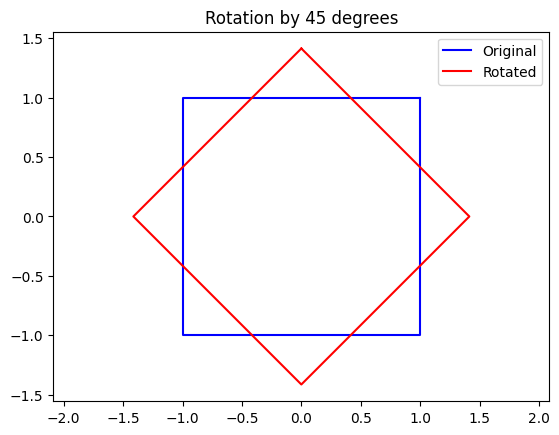

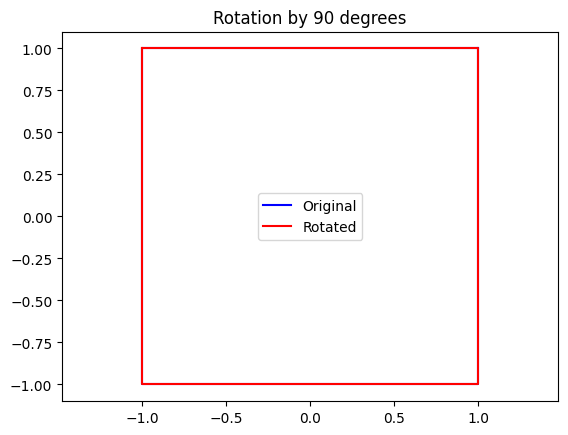

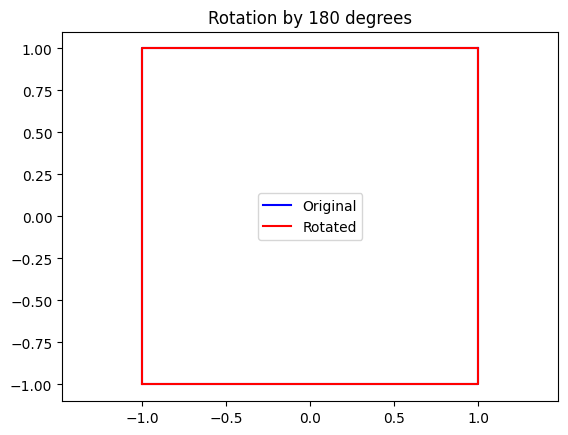

In [ ]:
import matplotlib.pyplot as plt

for theta in [45, 90, 180]:
    R = rotation_matrix(theta)
    rotated_points = R @ points
    plt.figure()
    plt.plot(points[0, :], points[1, :], 'b-', label='Original')
    plt.plot(rotated_points[0, :], rotated_points[1, :], 'r-', label='Rotated')
    plt.axis('equal')
    plt.legend()
    plt.title(f'Rotation by {theta} degrees')
    plt.show()


---

**EXERCISE** Generate a triangle, and apply the same rotation. Observe how the shape changes with different rotation angles.

---

**NOTA:** para la realización de este ejercicio. Tuve que pedir asesoría de chatgpt para saber las coordenadas de los puntos del triángulo, ya que al ejecutar el código la forma de la figura no era la correcta

In [ ]:
# Generar las coordenadas de los puntos que forman el triángulo
triangle_points = np.array([[0, 0.5, 1, 0], [0, np.sqrt(3)/2, 0, 0]])

In [ ]:
# Crear la función de rotación
def rotation_matrix(theta):
    theta_rad = np.deg2rad(theta)
    R = np.array([[np.cos(theta_rad), -np.sin(theta_rad)],
                  [np.sin(theta_rad), np.cos(theta_rad)]])
    return R

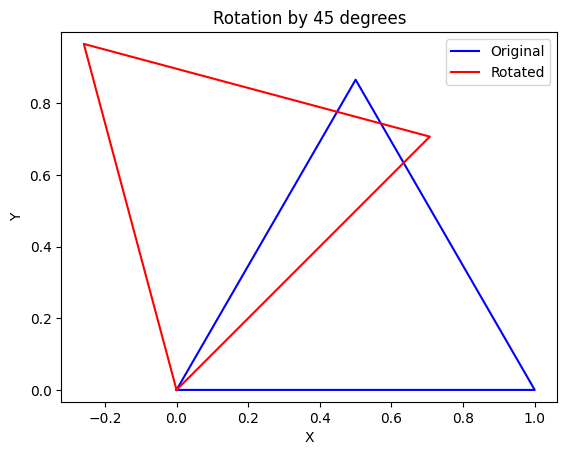

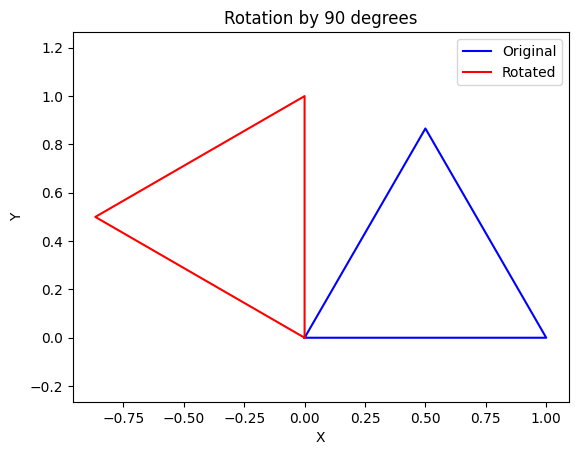

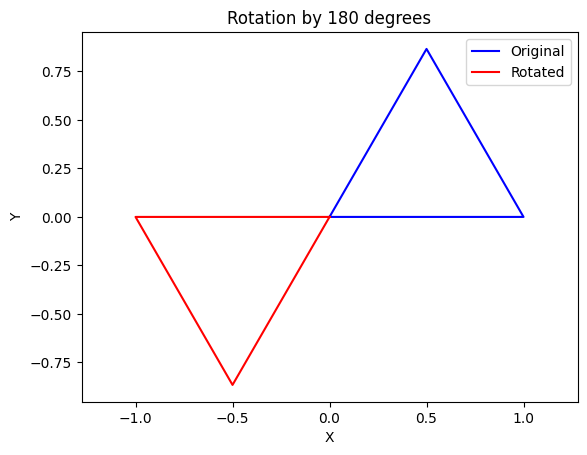

In [ ]:
rotation_angles = [45, 90, 180]

# Iterar sobre los ángulos de rotación y graficar el triángulo original y rotado
for theta in rotation_angles:
    R = rotation_matrix(theta)
    rotated_triangle_points = R @ triangle_points
    plt.figure()
    plt.plot(triangle_points[0, :], triangle_points[1, :], 'b-', label='Original')
    plt.plot(rotated_triangle_points[0, :], rotated_triangle_points[1, :], 'r-', label='Rotated')
    plt.axis('equal')
    plt.legend()
    plt.title(f'Rotation by {theta} degrees')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

## Summary

In this section we have seen how to using Numpy:

- Manipulate matrices;
- Solve linear systems;
- Compute Matrix inverses and determinants.

This again just touches on the capabilities of Numpy. For more information please refere to this [Python tutorial.](https://github.com/kuleshov/teaching-material/blob/master/tutorials/python/cs228-python-tutorial.ipynb)